<a href="https://colab.research.google.com/github/tansexe/AD-Lab/blob/main/Lab1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
file_path = "Data_Train.xlsx"

In [5]:
df = pd.read_excel(file_path)
print(df.head(5))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
print("\nNull Values in Each Column:")
print(df.isnull().sum())


Null Values in Each Column:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [ ]:
print("\nBefore Removing Null Rows:", df.shape)
df_cleaned = df.dropna()
print("After Removing Null Rows:", df_cleaned.shape)


Before Removing Null Rows: (10683, 11)
After Removing Null Rows: (10682, 11)


In [ ]:
column_name = 'Price'
if column_name in df.columns:
    mean_value = df[column_name].mean()
    #df[column_name].fillna(mean_value, inplace=True)
    df.fillna({column_name: mean_value}, inplace=True)
    print(f"\nNull values in '{column_name}' replaced with mean: {mean_value}")


Null values in 'Price' replaced with mean: 9087.064120565385


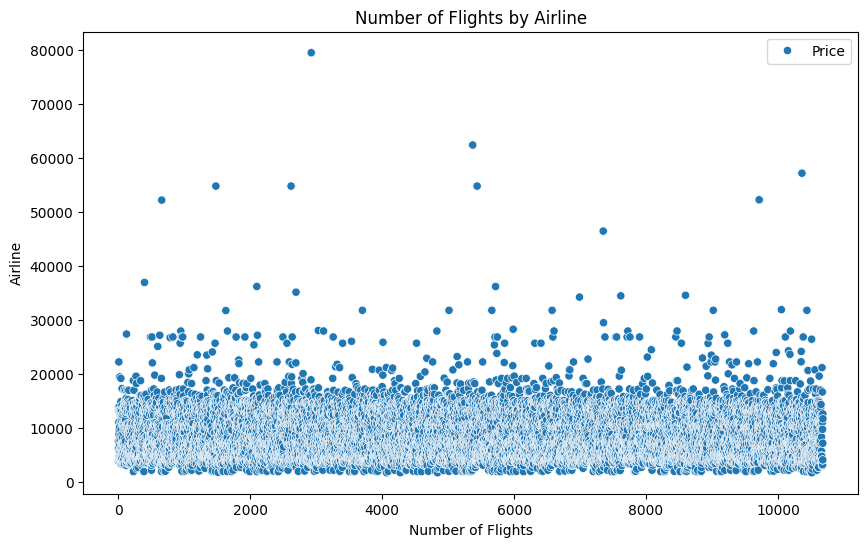

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#sns.scatterplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
sns.scatterplot(df)
plt.title("Number of Flights by Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()


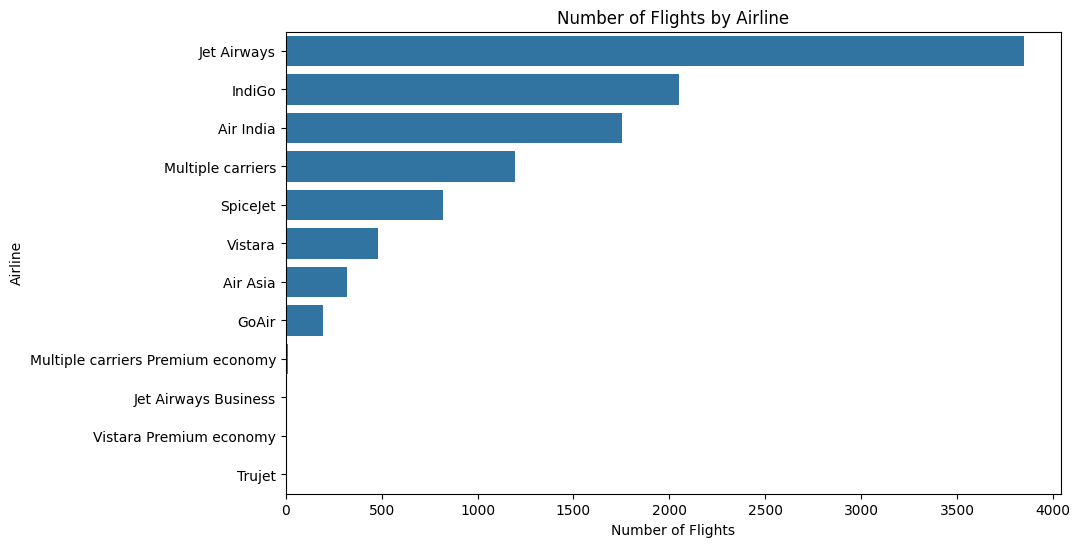

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
#sns.scatterplot(df)
plt.title("Number of Flights by Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()


In [ ]:
airline_counts = df['Airline'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Flight_Count']


In [ ]:
airline_avg_price = df.groupby('Airline')['Price'].mean().reset_index()
airline_avg_price.columns = ['Airline', 'Avg_Price']


In [ ]:
airline_data = pd.merge(airline_counts, airline_avg_price, on='Airline')

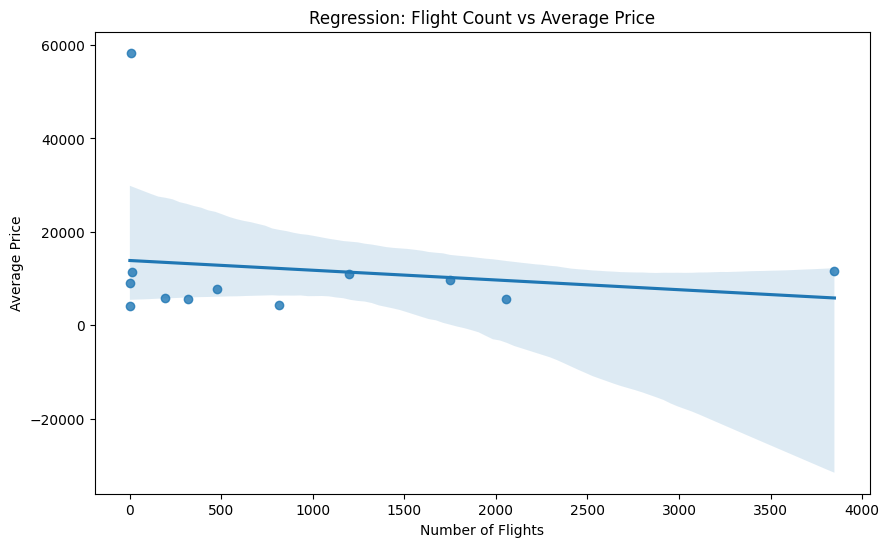

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x=airline_data['Flight_Count'], y=airline_data['Avg_Price'])
plt.title("Regression: Flight Count vs Average Price")
plt.xlabel("Number of Flights")
plt.ylabel("Average Price")
plt.show()

In [ ]:
print(df['Date_of_Journey'].head())
print(df['Date_of_Journey'].dtypes)

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object
object


In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [ ]:
print(df['Date_of_Journey'].dtypes)

datetime64[ns]


In [ ]:
grouped = df.groupby('Airline')

In [ ]:
avg_price = grouped['Price'].mean()
print(avg_price)

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64


In [ ]:
grouped.count()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,,,,,,,,,,
Air Asia,319,319,319,319,319,319,319,319,319,319
Air India,1752,1752,1752,1751,1752,1752,1752,1751,1752,1752
GoAir,194,194,194,194,194,194,194,194,194,194
IndiGo,2053,2053,2053,2053,2053,2053,2053,2053,2053,2053
Jet Airways,3849,3849,3849,3849,3849,3849,3849,3849,3849,3849
Jet Airways Business,6,6,6,6,6,6,6,6,6,6
Multiple carriers,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196
Multiple carriers Premium economy,13,13,13,13,13,13,13,13,13,13
SpiceJet,818,818,818,818,818,818,818,818,818,818


In [ ]:
flight_count = grouped.count()
print(flight_count)

                                   Date_of_Journey  Source  Destination  \
Airline                                                                   
Air Asia                                       319     319          319   
Air India                                     1752    1752         1752   
GoAir                                          194     194          194   
IndiGo                                        2053    2053         2053   
Jet Airways                                   3849    3849         3849   
Jet Airways Business                             6       6            6   
Multiple carriers                             1196    1196         1196   
Multiple carriers Premium economy               13      13           13   
SpiceJet                                       818     818          818   
Trujet                                           1       1            1   
Vistara                                        479     479          479   
Vistara Premium economy  

In [ ]:
agg_stats = grouped['Price'].agg(['mean', 'min', 'max', 'count'])
print(agg_stats)

                                           mean    min    max  count
Airline                                                             
Air Asia                            5590.260188   3383  13774    319
Air India                           9611.210616   2050  31945   1752
GoAir                               5861.056701   3398  22794    194
IndiGo                              5673.682903   2227  22153   2053
Jet Airways                        11643.923357   1840  54826   3849
Jet Airways Business               58358.666667  46490  79512      6
Multiple carriers                  10902.678094   5797  36983   1196
Multiple carriers Premium economy  11418.846154   9845  14629     13
SpiceJet                            4338.284841   1759  23267    818
Trujet                              4140.000000   4140   4140      1
Vistara                             7796.348643   3687  21730    479
Vistara Premium economy             8962.333333   5969  11793      3


In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
print(numerical_df)

       Price  Airlines  Duration_mins
0       3897         3            170
1       7662         1            445
2      13882         4           1140
3       6218         3            325
4      13302         3            285
...      ...       ...            ...
10678   4107         0            150
10679   4145         1            155
10680   7229         4            180
10681  12648        10            160
10682  11753         1            500

[10683 rows x 3 columns]


In [ ]:
correlation_matrix = numerical_df.corr()

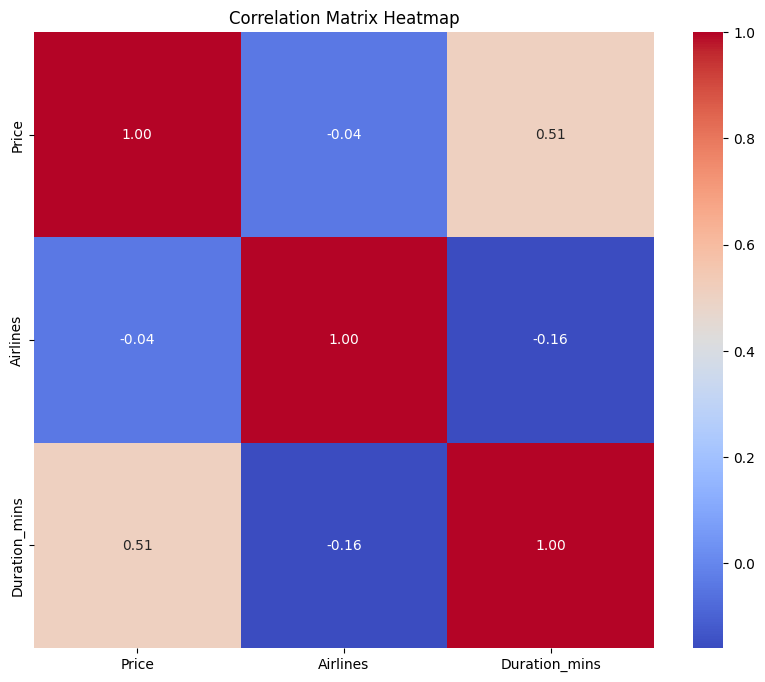

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Airlines'] = label_encoder.fit_transform(df['Airline'])

In [ ]:
print(df['Airlines'])

0         3
1         1
2         4
3         3
4         3
         ..
10678     0
10679     1
10680     4
10681    10
10682     1
Name: Airlines, Length: 10683, dtype: int64


In [ ]:
print(df['Airlines'].unique())

[ 3  1  4  8  6  2 10  0 11  5  7  9]


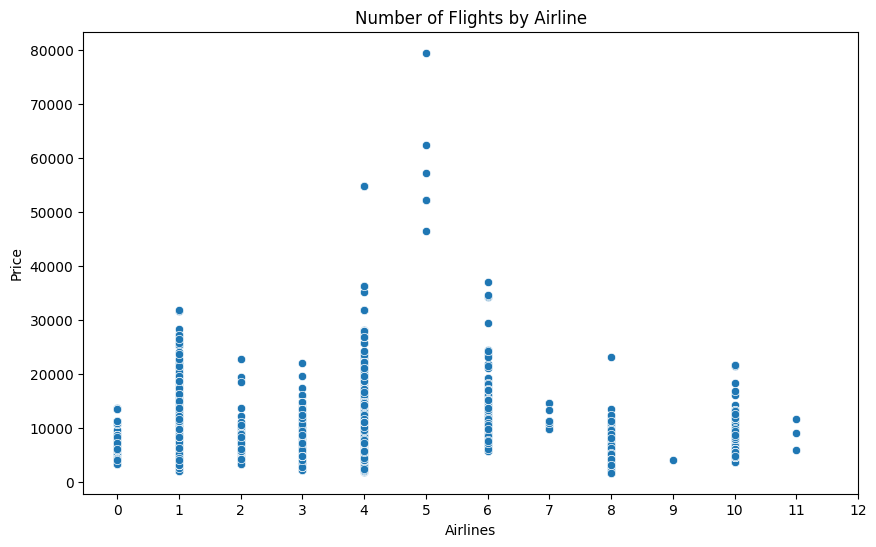

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Airlines'], y=df['Price'],)
plt.title("Number of Flights by Airline")
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.xticks(range(0, len(df['Airline'].unique()) + 1))
plt.show()

In [ ]:
def convert_duration(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

df['Duration_mins'] = df['Duration'].apply(convert_duration)


In [ ]:
df['Duration_mins']

,Duration_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


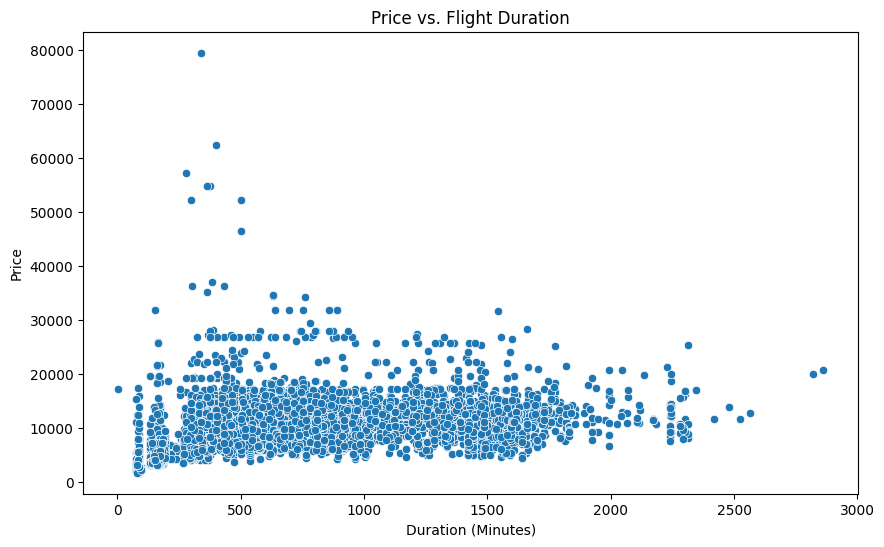

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Duration_mins'], y=df['Price'])
plt.title("Price vs. Flight Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Price")
plt.show()


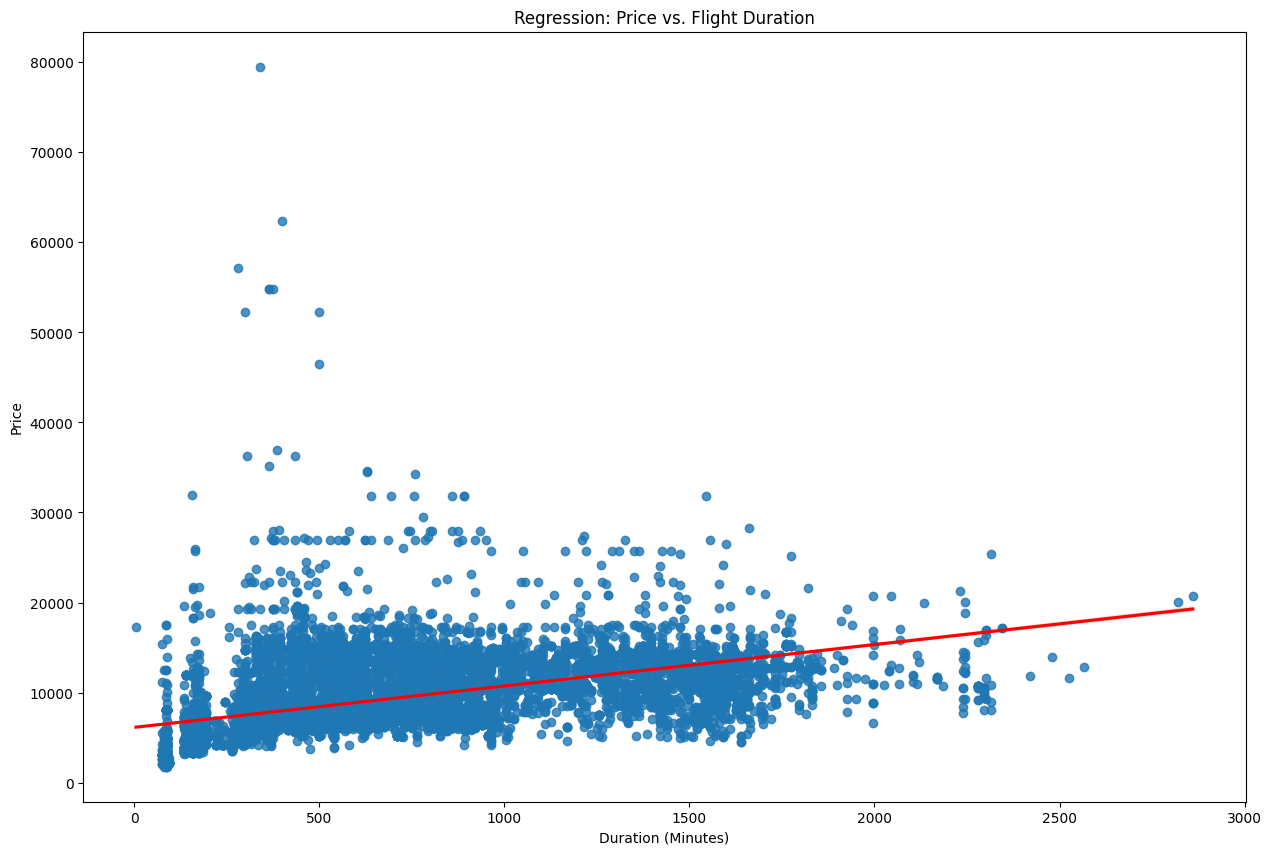

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x=df['Duration_mins'], y=df['Price'], line_kws={'color': 'red'})
plt.title("Regression: Price vs. Flight Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Price")
plt.show()


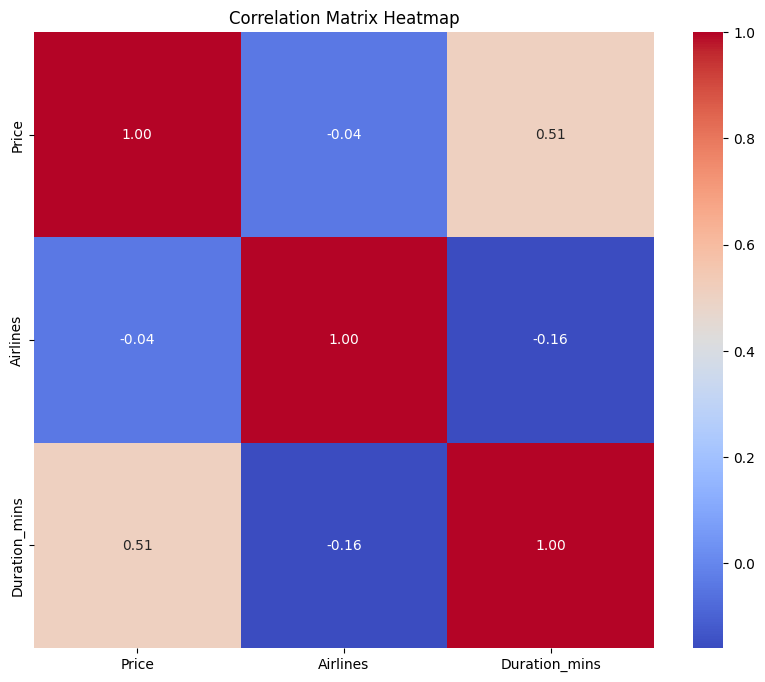

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()